In [1]:
# Import various packages
from __future__ import division
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from itertools import repeat
import random as rnd
from scipy import optimize

# Here we import the GA Toolkit (GATO) as GA
import ga_toolkit_v2 as ga

In [2]:
# Read the mock data (based on a fiducial Hubble parameter data, inspired from cosmology)
print('')
print('Now reading the data...')
X,Y,sY=np.loadtxt('./data/data_hz.txt',usecols=(0,1,2),unpack=True)
ndat=len(X)
print('....')
print('Done!')


Now reading the data...
....
Done!


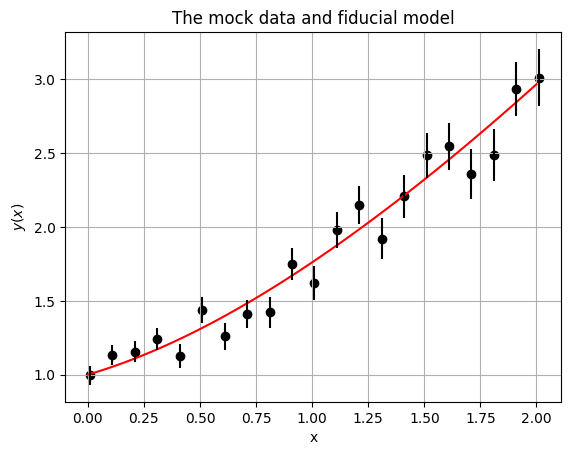

In [3]:
# Plot of the data and the model
Xm = np.linspace(0,2,100)
Ym = np.sqrt(0.3*(1+Xm)**3+0.7)

fig0 = plt.figure(0)
plt.plot(Xm, Ym, 'r')
plt.scatter(X,Y, c='black')
plt.errorbar(X,Y, yerr= sY, ecolor = 'k', ls='none')
plt.title(r'The mock data and fiducial model')
plt.xlabel('x')
plt.ylabel(r'$y(x)$')
plt.grid()
plt.show()

In [4]:
# The mock data chi^2
def chi2_mock(om):
   vecY = np.sqrt(om*(1+X)**3+1-om)
   return np.sum(((Y-vecY)/sY)**2)

In [5]:
# Here we find the best-fit of the mock data to the real model for compararison's sake
# This is a naive example, but it highlights how to use the code etc
minimum = optimize.fmin(chi2_mock, 0.1, full_output=True, disp=True)
print("om_bf = ",minimum[0][0])
print("chi^2_min = ",minimum[1])

Optimization terminated successfully.
         Current function value: 22.611130
         Iterations: 15
         Function evaluations: 30
om_bf =  0.2923437500000007
chi^2_min =  22.611130305949974


In [6]:
# This calculates the chi^2 for the GA
# We also marginalize analytically over a possible offset!
# In this case chi^2_marg=A-B^2/C when y(x)=y_0+GA_prior(x)

def chi2(kid,gram):
	vecy = list(map(ga.make_function,list(X),repeat(kid,ndat),repeat(gram,ndat),repeat(GA_prior,ndat)))
	A = np.sum(((Y-vecy)/sY)**2)
	B = np.sum((Y-vecy)/sY**2)
	C = np.sum(1/sY**2)
	return A-B**2/C

# This calculates the offset
def offset(kid,gram):
	vecy = list(map(ga.make_function,list(X),repeat(kid,ndat),repeat(gram,ndat),repeat(GA_prior,ndat)))
	B = np.sum((Y-vecy)/sY**2)
	C = np.sum(1/sY**2)
	return B/C

In [8]:
# Here you can also specify any physical priors.
# For example, you might need a scaling GA~x for x<<1, then you can say
# GA = x*(1+GAx) etc.

def GA_prior(x, GAx):
	return x*(1.+GAx)

In [9]:
# Here we define the grammar
# More grammars can be added in the ga_toolkit_v2 file

grammar = ['poly','cpl']

In [10]:
# Different seeds // This is equal to how many chains we need
n_seeds = 3

# Different crossover and mutation rates
# Do a small grid to make sure we sample well the posterior
cross_list = [0.70, 0.75, 0.80]
mut_list = [0.25, 0.30, 0.35]

# Final number of chains
n_chains = n_seeds*len(cross_list)*len(mut_list)

# Here are the input params // Some parameters we change during the actual run, see below
input_params={
'Nchains' : n_chains,
'Ngens' : 100,
'Npops' : 100,
'Nseed' : 1,
'ranges': [[-1,1], [0,len(grammar)], [0, 2], [0, 10]],
'length': 4,
'depth' : 4,
'selectionrate' : 0.3,
'toursize' : 4,
'crossoverrate' : 0.75,
'mutationrate' : 0.3,
'verbose' :  True,
'save_chains' :  [False, 'chain'],
'resume_chains' :  [False, './chains/chain_xxx.pic'],
'grammar' : grammar,
'GA_prior' : 'f(x) = '+str(GA_prior(symbols("x"), symbols("GA")))
}

In [11]:
# Allocate some variables where we store the results
# bfps is the best fit per step // useful for plotting ;-)
run = [0] * input_params['Nchains']
bfps = [0] * input_params['Nchains']
seeds = [0] * input_params['Nchains']

In [12]:
# Here we do the actual runs
# We change some of the params to sample the posterior well, namely the seed, the crossover and mutation rates

ichain = 0
vec = []
for iseed in range(n_seeds):
	input_params['Nseed'] = rnd.randrange(1,100000)
	for cross in range(len(cross_list)):
		input_params['crossoverrate'] = cross_list[cross]
		for mut in range(len(mut_list)):
			input_params['mutationrate'] = mut_list[mut]
			run[ichain] = ga.evolution(chi2, input_params, grammar)
			bfps[ichain] = [row[0] for row in run[ichain]]
			vec.append([input_params['Nseed'],cross,mut])
			ichain +=1
print(vec)


   Genetic Algorithm TOolkit (GATO)

     _.---.._             _.---...__  
  .-'   /\   \          .'  /\     /  
  `.   (  )   \        /   (  )   /   
    `.  \/   .'\      /`.   \/  .'    
      ``---''   )    (   ``---''      
              .';.--.;`.              
            .' /_...._\ `.            
          .'   `.a  a.'   `.          
         (        \/        )         
          `.___..-'`-..___.'          
             \          /             
              `-.____.-'              

Developed by Savvas Nesseris (2022-2023), v2.2.

If you use this code for a publication, please cite:
https://arxiv.org/abs/2211.14142

For more info please see:
https://github.com/snesseris/Genetic-Algorithms

Published under the GPLv3:
https://www.gnu.org/licenses/gpl-3.0.en.html

----------------------------------------


Now running seed 88332
This is generation:  1
This is generation:  2
This is generation:  3
This is generation:  4
This is generation:  5
This is generation:  6
This 

This is generation:  46
This is generation:  47
This is generation:  48
This is generation:  49
This is generation:  50
This is generation:  51
This is generation:  52
This is generation:  53
This is generation:  54
This is generation:  55
This is generation:  56
This is generation:  57
This is generation:  58
This is generation:  59
This is generation:  60
This is generation:  61
This is generation:  62
This is generation:  63
This is generation:  64
This is generation:  65
This is generation:  66
This is generation:  67
This is generation:  68
This is generation:  69
This is generation:  70
This is generation:  71
This is generation:  72
This is generation:  73
This is generation:  74
This is generation:  75
This is generation:  76
This is generation:  77
This is generation:  78
This is generation:  79
This is generation:  80
This is generation:  81
This is generation:  82
This is generation:  83
This is generation:  84
This is generation:  85
This is generation:  86
This is generati

This is generation:  13
This is generation:  14
This is generation:  15
This is generation:  16
This is generation:  17
This is generation:  18
This is generation:  19
This is generation:  20
This is generation:  21
This is generation:  22
This is generation:  23
This is generation:  24
This is generation:  25
This is generation:  26
This is generation:  27
This is generation:  28
This is generation:  29
This is generation:  30
This is generation:  31
This is generation:  32
This is generation:  33
This is generation:  34
This is generation:  35
This is generation:  36
This is generation:  37
This is generation:  38
This is generation:  39
This is generation:  40
This is generation:  41
This is generation:  42
This is generation:  43
This is generation:  44
This is generation:  45
This is generation:  46
This is generation:  47
This is generation:  48
This is generation:  49
This is generation:  50
This is generation:  51
This is generation:  52
This is generation:  53
This is generati

This is generation:  85
This is generation:  86
This is generation:  87
This is generation:  88
This is generation:  89
This is generation:  90
This is generation:  91
This is generation:  92
This is generation:  93
This is generation:  94
This is generation:  95
This is generation:  96
This is generation:  97
This is generation:  98
This is generation:  99

Now running seed 12829
This is generation:  1
This is generation:  2
This is generation:  3
This is generation:  4
This is generation:  5
This is generation:  6
This is generation:  7
This is generation:  8
This is generation:  9
This is generation:  10
This is generation:  11
This is generation:  12
This is generation:  13
This is generation:  14
This is generation:  15
This is generation:  16
This is generation:  17
This is generation:  18
This is generation:  19
This is generation:  20
This is generation:  21
This is generation:  22
This is generation:  23
This is generation:  24
This is generation:  25
This is generation:  26
T

This is generation:  56
This is generation:  57
This is generation:  58
This is generation:  59
This is generation:  60
This is generation:  61
This is generation:  62
This is generation:  63
This is generation:  64
This is generation:  65
This is generation:  66
This is generation:  67
This is generation:  68
This is generation:  69
This is generation:  70
This is generation:  71
This is generation:  72
This is generation:  73
This is generation:  74
This is generation:  75
This is generation:  76
This is generation:  77
This is generation:  78
This is generation:  79
This is generation:  80
This is generation:  81
This is generation:  82
This is generation:  83
This is generation:  84
This is generation:  85
This is generation:  86
This is generation:  87
This is generation:  88
This is generation:  89
This is generation:  90
This is generation:  91
This is generation:  92
This is generation:  93
This is generation:  94
This is generation:  95
This is generation:  96
This is generati

This is generation:  14
This is generation:  15
This is generation:  16
This is generation:  17
This is generation:  18
This is generation:  19
This is generation:  20
This is generation:  21
This is generation:  22
This is generation:  23
This is generation:  24
This is generation:  25
This is generation:  26
This is generation:  27
This is generation:  28
This is generation:  29
This is generation:  30
This is generation:  31
This is generation:  32
This is generation:  33
This is generation:  34
This is generation:  35
This is generation:  36
This is generation:  37
This is generation:  38
This is generation:  39
This is generation:  40
This is generation:  41
This is generation:  42
This is generation:  43
This is generation:  44
This is generation:  45
This is generation:  46
This is generation:  47
This is generation:  48
This is generation:  49
This is generation:  50
This is generation:  51
This is generation:  52
This is generation:  53
This is generation:  54
This is generati

This is generation:  76
This is generation:  77
This is generation:  78
This is generation:  79
This is generation:  80
This is generation:  81
This is generation:  82
This is generation:  83
This is generation:  84
This is generation:  85
This is generation:  86
This is generation:  87
This is generation:  88
This is generation:  89
This is generation:  90
This is generation:  91
This is generation:  92
This is generation:  93
This is generation:  94
This is generation:  95
This is generation:  96
This is generation:  97
This is generation:  98
This is generation:  99

Now running seed 96758
This is generation:  1
This is generation:  2
This is generation:  3
This is generation:  4
This is generation:  5
This is generation:  6
This is generation:  7
This is generation:  8
This is generation:  9
This is generation:  10
This is generation:  11
This is generation:  12
This is generation:  13
This is generation:  14
This is generation:  15
This is generation:  16
This is generation:  17
T

This is generation:  35
This is generation:  36
This is generation:  37
This is generation:  38
This is generation:  39
This is generation:  40
This is generation:  41
This is generation:  42
This is generation:  43
This is generation:  44
This is generation:  45
This is generation:  46
This is generation:  47
This is generation:  48
This is generation:  49
This is generation:  50
This is generation:  51
This is generation:  52
This is generation:  53
This is generation:  54
This is generation:  55
This is generation:  56
This is generation:  57
This is generation:  58
This is generation:  59
This is generation:  60
This is generation:  61
This is generation:  62
This is generation:  63
This is generation:  64
This is generation:  65
This is generation:  66
This is generation:  67
This is generation:  68
This is generation:  69
This is generation:  70
This is generation:  71
This is generation:  72
This is generation:  73
This is generation:  74
This is generation:  75
This is generati

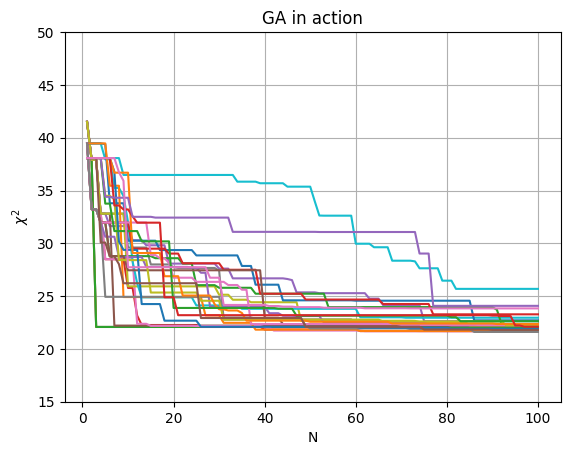

In [13]:
fig1=plt.figure(1)
for ii in range(input_params['Nchains']):
	plt.plot(range(1,input_params['Ngens']+1,1), bfps[ii])
#plt.xscale("log")
#plt.yscale("log")
#plt.legend(loc='upper right')
plt.title(r'GA in action')
plt.xlabel('N')
plt.ylabel(r'$\chi^2$')
ax = plt.gca()
ax.set_ylim([15,50])
plt.grid()
#plt.close(1)

In [14]:
print('The best-fits from the runs are:')
best_fits=[row[-1] for row in bfps]
print(best_fits)
val, idx = min((val, idx) for (idx, val) in enumerate(best_fits))
print('')
print('The overall best-fit from the runs [chi^2, # of run]:')
print([val,idx])

print('')
print('With seed =',seeds[idx])

print('')
print('The best-fit symbolic expression is:')

# This uses sympy to write down a symbolic expression.
xs=symbols("x")
expr=ga.make_function(xs,run[idx][-1][1],grammar,GA_prior)+offset(run[idx][-1][1],grammar)
print('')
print('GA(x) =',expr)

print('')
print('with a chi^2 =',chi2(run[idx][-1][1],grammar))

The best-fits from the runs are:
[22.07934465227845, 22.07934465227845, 22.07934465227845, 21.685101369206222, 22.630828504569763, 22.20911229084868, 21.672495778312168, 22.17877364591277, 22.222579765470527, 22.954470146891936, 22.70709246657907, 21.694221457296862, 22.360488862117563, 23.275873294264102, 22.306329696195917, 22.24263687900975, 22.265754914419176, 21.608982029942126, 22.257756483740195, 25.686380922599255, 21.910581937597726, 22.35623606683066, 22.621687948967065, 22.106391649708712, 24.079235848341796, 21.801244481939193, 23.837310835154994]

The overall best-fit from the runs [chi^2, # of run]:
[21.608982029942126, 17]

With seed = 0

The best-fit symbolic expression is:

GA(x) = x*(0.50559783543176*x**3/(x + 0.623696230969572)**3 + 0.863755855397428*x**3/(0.977569260542047*x + 1)**3 + 0.485873202536924) + 1.01953873560231

with a chi^2 = 21.608982029942126


Now plotting the best-fitting function...


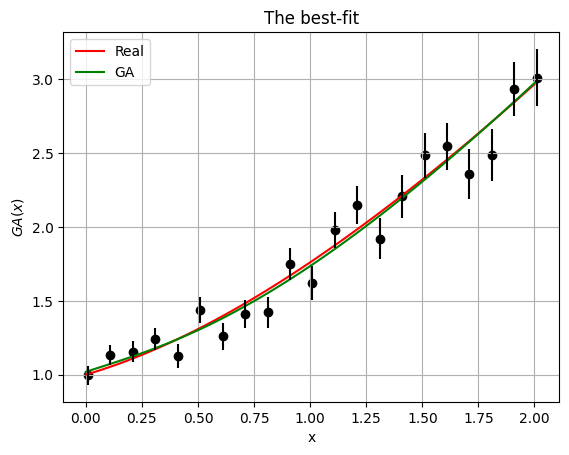

In [15]:
print('Now plotting the best-fitting function...')
Xf = np.linspace(0,2,100)
Yf = list(map(ga.make_function,Xf,repeat(run[idx][-1][1],len(Xf)),repeat(grammar,len(Xf)),repeat(GA_prior,len(Xf))))+offset(run[idx][-1][1],grammar)

# Again the fiducial model
Ym = np.sqrt(0.3*(1+Xf)**3+0.7)

fig2 = plt.figure(2)
plt.plot(Xf, Ym, 'r', label='Real')
plt.plot(Xf, Yf, 'g', label='GA')
plt.scatter(X,Y, c='black')
plt.errorbar(X,Y, yerr= sY, ecolor = 'k', ls='none')
plt.title(r'The best-fit')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel(r'$GA(x)$')
plt.grid()
plt.show()
fig2.savefig('plot_func.pdf', bbox_inches='tight')
plt.close(2)